# ARIMA TIME SERIES - RETURNS PREDICTION

In [1]:
# Import libraries and dependencies
%matplotlib inline
import yfinance as yf
import quantstats as qs
import numpy as np
import pandas as pd
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

## Data collection and cleaning 

In [2]:
# Names of intersted stocks
stock_names = {'ABBV',
               'PFE',
               'BAC',
               'COKE',
               'SQ',
               'AAPL',
               'AMD',
               'FDX',
               'EBAY',
               'AMZN',
               'C',
               'F',
               'GDX',
               'USO'}

In [3]:
# Get a list of all closing prices
stock_list = {}

for stock in stock_names:
    
    stock_list[stock] = qs.utils.download_returns(stock)


    
# Limit all close prices to the last 5 years 
close_all = []

for name in stock_names:
    
    close_new = stock_list[name].loc["2020-01-01":]
    
    close_all.append(close_new)
    
    
# Convert close prices to dataframe
df_close = pd.DataFrame(close_all[:]).T
df_close.columns = stock_names

display(df_close)

,F,SQ,PFE,AMD,C,USO,BAC,AMZN,ABBV,AAPL,EBAY,GDX,FDX,COKE
Date,,,,,,,,,,,,,,
2020-01-02,0.012903,0.020301,-0.001021,0.070650,0.016773,0.000000,0.011925,0.027151,0.011407,0.022816,0.005262,0.002391,0.025726,-0.005809
2020-01-03,-0.022293,-0.013003,-0.005365,-0.010183,-0.018836,0.028884,-0.020763,-0.012139,-0.009492,-0.009722,-0.009366,-0.006133,-0.012379,0.011898
2020-01-06,-0.005429,-0.006825,-0.001284,-0.004321,-0.003137,-0.001517,-0.001433,0.014886,0.007892,0.007968,-0.005006,0.001714,0.000783,-0.013123
2020-01-07,0.009825,0.032284,-0.003344,-0.002893,-0.008685,-0.002280,-0.006600,0.002092,-0.005705,-0.004703,-0.004472,0.009583,0.009785,-0.010106
2020-01-08,0.000000,0.046602,0.008000,-0.008705,0.007618,-0.035796,0.010110,-0.007809,0.007087,0.016086,-0.000562,-0.038983,0.015052,-0.006806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-23,0.012729,0.028094,0.024836,0.039369,0.009110,0.055722,0.013376,0.020600,0.004545,0.010257,-0.002181,0.041167,0.001313,-0.002494
2021-08-24,0.027494,-0.000998,-0.031043,-0.010297,0.016222,0.033152,0.013933,0.012220,0.002681,-0.000601,-0.004918,-0.000311,0.003410,-0.006050
2021-08-25,0.006881,-0.009624,-0.017983,0.006038,0.015825,0.009289,0.016152,-0.001997,0.006016,-0.008421,0.018122,-0.013391,0.009559,-0.003949


In [4]:
# Drop duplicates
df_close.drop_duplicates(inplace=False)

# Drop NA and infinite values
df_close = df_close.replace(-np.inf, np.nan).dropna()
df_close.head()

,F,SQ,PFE,AMD,C,USO,BAC,AMZN,ABBV,AAPL,EBAY,GDX,FDX,COKE
Date,,,,,,,,,,,,,,
2020-01-02,0.012903,0.020301,-0.001021,0.070650,0.016773,0.000000,0.011925,0.027151,0.011407,0.022816,0.005262,0.002391,0.025726,-0.005809
2020-01-03,-0.022293,-0.013003,-0.005365,-0.010183,-0.018836,0.028884,-0.020763,-0.012139,-0.009492,-0.009722,-0.009366,-0.006133,-0.012379,0.011898
2020-01-06,-0.005429,-0.006825,-0.001284,-0.004321,-0.003137,-0.001517,-0.001433,0.014886,0.007892,0.007968,-0.005006,0.001714,0.000783,-0.013123
2020-01-07,0.009825,0.032284,-0.003344,-0.002893,-0.008685,-0.002280,-0.006600,0.002092,-0.005705,-0.004703,-0.004472,0.009583,0.009785,-0.010106
2020-01-08,0.000000,0.046602,0.008000,-0.008705,0.007618,-0.035796,0.010110,-0.007809,0.007087,0.016086,-0.000562,-0.038983,0.015052,-0.006806


In [5]:
# Count nulls/checking final df
df_close.isnull().sum()

F       0
SQ      0
PFE     0
AMD     0
C       0
USO     0
BAC     0
AMZN    0
ABBV    0
AAPL    0
EBAY    0
GDX     0
FDX     0
COKE    0
dtype: int64

## Autocorrelation and Partial Autocorrelation Analysis

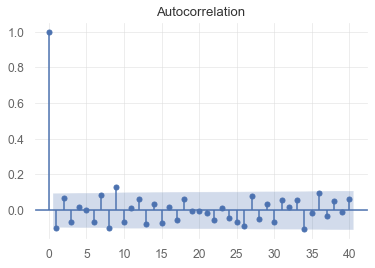

In [6]:
# Plot ACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_close.AMZN, lags=40);

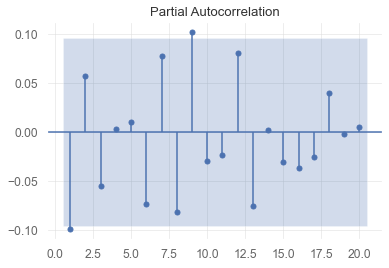

In [7]:
# Plot PACF
plot_pacf(df_close.AMZN, zero=False, lags=20);

In [8]:
from statsmodels.tsa.stattools import adfuller
adfuller(df_close.AMZN)

(-22.536264489386454,
 0.0,
 0,
 417,
 {'1%': -3.446129402876608,
  '5%': -2.8684960761128346,
  '10%': -2.570475362616382},
 -1929.762339776898)

## ARIMA Model

In [9]:
# Run ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# Create the ARIMA model using the return values and the order
# For the order parameter, the first 1 indicates the number of AR lags
# For the order parameter, the second 1 indicates the number of MA lags

model = ARIMA(df_close['AMZN'].values, order=(1,1,1))


In [10]:
# Fit the model to the data
result_ARIMA = model.fit()

In [11]:
# Display model summary
result_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  417
Model:                 ARIMA(1, 1, 1)   Log Likelihood                1014.832
Method:                       css-mle   S.D. of innovations              0.021
Date:                Sun, 29 Aug 2021   AIC                          -2021.664
Time:                        13:49:43   BIC                          -2005.532
Sample:                             1   HQIC                         -2015.286
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.051e-05   7.76e-06     -1.354      0.176   -2.57e-05     4.7e-06
ar.L1.D.y     -0.1008      0.049     -2.067      0.039      -0.196      -0.005
ma.L1.D.y     -1.0000      0.007   -150.809      0.000      -1.013      -0.987
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -9.9192           +0.0000j            9.9192            0.5000
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'90 Days Forecast'}>

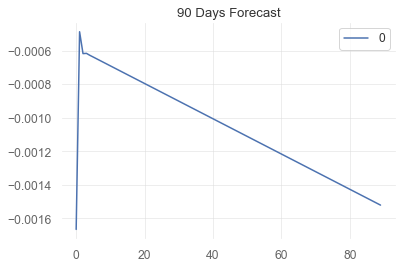

In [16]:
pd.DataFrame(result_ARIMA.forecast(steps=90)[0]).plot(title="90 Days Forecast")